In [1]:
import networkx as nx
import osmnx as ox
import fiona
import math

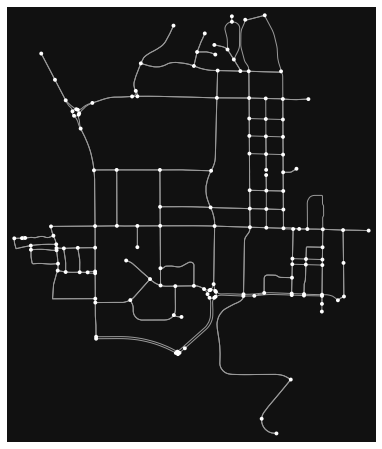

In [2]:
G = ox.graph_from_place("Purdue University,West Lafayette, Indiana, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [3]:
place = "Purdue University,West Lafayette, Indiana"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(427, 62)

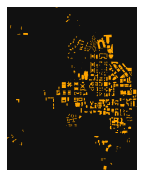

In [4]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [5]:
ox.save_graphml(G, filepath="./mynetwork.graphml")

In [6]:
import json

In [7]:
cc = json.loads(gdf.to_json())
with open("sample_2.json", "w") as outfile:
     json_object = json.dump(cc, outfile, indent=4, sort_keys=True)
 

In [8]:
f = open("sample_2.json")

cx_try = json.load(f)

In [9]:
type(cx_try)

dict

In [10]:
cx_try["features"][5]['geometry']['coordinates'][0][0]

[-86.9163514, 40.4337315]

In [11]:
new_json = []
for build_obj in cx_try["features"]:
    new_obj = {}
    if build_obj['geometry']['type'] == 'Point':
        new_obj['coordinates'] = build_obj['geometry']['coordinates']
    else:
        new_obj['coordinates'] = build_obj['geometry']['coordinates'][0][0]
    
    new_obj['building'] = build_obj['properties']['building']
    new_obj['name'] =build_obj['properties']['name']
    new_json.append(new_obj)

In [12]:
new_json

[{'coordinates': [-86.9161928, 40.4198167],
  'building': 'university',
  'name': 'Veterinary Pathobiology Research Building'},
 {'coordinates': [-86.9160409, 40.4192381],
  'building': 'university',
  'name': 'Veterinary Animal Isolation Building 1'},
 {'coordinates': [-86.9215549, 40.4263298],
  'building': 'dormitory',
  'name': 'Wood (Elizabeth G. and William R.) Residence Hall'},
 {'coordinates': [-86.9209039, 40.4270504],
  'building': 'dormitory',
  'name': 'Vawter (Everett B.) Residence Hall'},
 {'coordinates': [-86.9205502, 40.4265483],
  'building': 'dormitory',
  'name': 'Warren (Martha E. and Eugene K.) Residence Hall'},
 {'coordinates': [-86.9163514, 40.4337315],
  'building': 'yes',
  'name': 'Mackey Arena'},
 {'coordinates': [-86.9149266, 40.428271],
  'building': 'university',
  'name': 'Elliott Hall of Music (ELLT)'},
 {'coordinates': [-86.9132656, 40.4300359],
  'building': 'university',
  'name': 'Physics Building (PHYS)'},
 {'coordinates': [-86.9171681, 40.4327668],

In [13]:
edges = {}
with open('edge.txt') as file:
    edge = {}
    for line in file:
        if 'tid' in line:
            edge['tid'] = int(line.split(': ')[1].strip())
        elif 'source_coords' in line:
            edge['source_coords'] = tuple(map(float, line.split(': ')[1].strip().split(',')))
        elif 'target_coords' in line:
            edge['target_coords'] = tuple(map(float, line.split(': ')[1].strip().split(',')))
        elif '---next---' in line:
            edges[edge['tid']] = {'source_coords': edge['source_coords'], 'target_coords': edge['target_coords']}
            edge = {}

print(edges)

{0: {'source_coords': (-86.9149965, 40.4220781), 'target_coords': (-86.9137755, 40.422052)}, 1: {'source_coords': (-86.9149965, 40.4220781), 'target_coords': (-86.9151306, 40.4204207)}, 2: {'source_coords': (-86.9159956, 40.4220994), 'target_coords': (-86.9149965, 40.4220781)}, 3: {'source_coords': (-86.9159956, 40.4220994), 'target_coords': (-86.9160192, 40.4213432)}, 4: {'source_coords': (-86.9159956, 40.4220994), 'target_coords': (-86.9159858, 40.4224159)}, 5: {'source_coords': (-86.9137708, 40.4223617), 'target_coords': (-86.9149843, 40.4223915)}, 6: {'source_coords': (-86.9137708, 40.4223617), 'target_coords': (-86.9137603, 40.4230536)}, 7: {'source_coords': (-86.9149843, 40.4223915), 'target_coords': (-86.9159858, 40.4224159)}, 8: {'source_coords': (-86.9149843, 40.4223915), 'target_coords': (-86.9137603, 40.4230536)}, 9: {'source_coords': (-86.9159858, 40.4224159), 'target_coords': (-86.9159956, 40.4220994)}, 10: {'source_coords': (-86.9159858, 40.4224159), 'target_coords': (-86

In [17]:
with open('tid_offset.txt', 'r') as file:
    lines = file.readlines()

second_last_line = lines[-1].strip()  # Get the second last line and remove leading/trailing white space
last_tid = int(second_last_line.split()[0])  # Get the first number on the line as an integer

print(last_tid)

317


In [18]:
def find_closest_edge(building, edges):
    min_distance = math.inf
    closest_edge = None
    for tid, edge in edges.items():
        source_coords = edge['source_coords']
        target_coords = edge['target_coords']
        distance_to_source = math.sqrt((building['coordinates'][0] - source_coords[0])**2 + (building['coordinates'][1] - source_coords[1])**2)
        distance_to_target = math.sqrt((building['coordinates'][0] - target_coords[0])**2 + (building['coordinates'][1] - target_coords[1])**2)
        if distance_to_source < min_distance:
            min_distance = distance_to_source
            closest_edge = tid
        if distance_to_target < min_distance:
            min_distance = distance_to_target
            closest_edge = tid
    return closest_edge

# Example usage
tid_building = last_tid + 1
for building in new_json:
    closest_edge = find_closest_edge(building, edges)
    building['closest_tid'] = closest_edge
    building['tid'] = tid_building
    tid_building = tid_building + 1
    print(building)

{'coordinates': [-86.9161928, 40.4198167], 'building': 'university', 'name': 'Veterinary Pathobiology Research Building', 'closest_tid': 197, 'tid': 318}
{'coordinates': [-86.9160409, 40.4192381], 'building': 'university', 'name': 'Veterinary Animal Isolation Building 1', 'closest_tid': 197, 'tid': 319}
{'coordinates': [-86.9215549, 40.4263298], 'building': 'dormitory', 'name': 'Wood (Elizabeth G. and William R.) Residence Hall', 'closest_tid': 22, 'tid': 320}
{'coordinates': [-86.9209039, 40.4270504], 'building': 'dormitory', 'name': 'Vawter (Everett B.) Residence Hall', 'closest_tid': 22, 'tid': 321}
{'coordinates': [-86.9205502, 40.4265483], 'building': 'dormitory', 'name': 'Warren (Martha E. and Eugene K.) Residence Hall', 'closest_tid': 43, 'tid': 322}
{'coordinates': [-86.9163514, 40.4337315], 'building': 'yes', 'name': 'Mackey Arena', 'closest_tid': 56, 'tid': 323}
{'coordinates': [-86.9149266, 40.428271], 'building': 'university', 'name': 'Elliott Hall of Music (ELLT)', 'closes

In [22]:
with open("building_retry.txt", 'w') as file:
    for building in new_json:
        file.write(f"tid: {building['tid']}\n")
        file.write(f"length: NA\n")
        file.write(f"source:  \n")
        file.write(f"target:  \n")
        file.write(f"source_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"target_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"name: {building['name']}\n")
        file.write(f"type: {building['building']}\n")
        file.write(f"neighbours: {building['closest_tid']}\n")
        file.write("---next---\n")

In [23]:
with open("edge.txt", 'a') as file:
    for building in new_json:
        file.write(f"tid: {building['tid']}\n")
        file.write(f"length: NA\n")
        file.write(f"source:  \n")
        file.write(f"target:  \n")
        file.write(f"source_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"target_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"name: {building['name']}\n")
        file.write(f"type: {building['building']}\n")
        file.write(f"neighbours: {building['closest_tid']}\n")
        file.write("---next---\n")